In [186]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [187]:
train_path = 'train'
valid_path = 'validation'
test_path = 'test'

In [188]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(256, 256), classes=['original', 'modified'], batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(256, 256), classes=['original', 'modified'], batch_size=4)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(256, 256), classes=['original', 'modified'], batch_size=10)

Found 65 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 75 images belonging to 2 classes.


In [189]:
def plots(ims, figsize=(12, 6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0, 2, 3, 1))
        f = plt.figure(figsize=figsize)
        cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
        for i in range(len(ims)):
            sp = f.add_subplot(rows, cols, i+1)
            sp.axis('Off')
            if titles is not None:
                sp.set_title(titles[i], fontsize=16)
            plt.imshow(ims[i], interpolation=None if interp else 'none')

In [190]:
imgs, labels = next(train_batches)

/home/haripriyaaithal/anaconda3/lib/python3.5/site-packages/matplotlib/text.py:1190: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


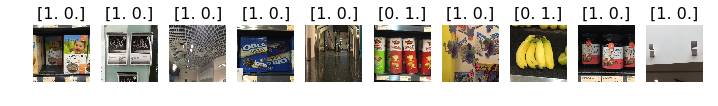

In [191]:
plots(imgs, titles=labels)

In [192]:
# Build CNN

In [193]:
model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
        Flatten(), 
        Dense(2, activation='softmax'),
    ])

In [194]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [195]:
model.fit_generator(train_batches, steps_per_epoch=15, validation_data=valid_batches, validation_steps=100, epochs=15, verbose=2)

Epoch 1/15
 - 9s - loss: 2.5970 - acc: 0.8335 - val_loss: 3.1893 - val_acc: 0.8021
Epoch 2/15
 - 8s - loss: 2.5832 - acc: 0.8397 - val_loss: 3.2581 - val_acc: 0.7979
Epoch 3/15
 - 8s - loss: 2.4681 - acc: 0.8469 - val_loss: 3.2236 - val_acc: 0.8000
Epoch 4/15
 - 8s - loss: 2.4753 - acc: 0.8464 - val_loss: 3.2236 - val_acc: 0.8000
Epoch 5/15
 - 8s - loss: 2.0507 - acc: 0.8728 - val_loss: 3.2065 - val_acc: 0.8011
Epoch 6/15
 - 8s - loss: 2.6826 - acc: 0.8336 - val_loss: 3.2409 - val_acc: 0.7989
Epoch 7/15
 - 8s - loss: 2.4609 - acc: 0.8473 - val_loss: 3.2065 - val_acc: 0.8011
Epoch 8/15
 - 8s - loss: 2.5760 - acc: 0.8402 - val_loss: 3.2409 - val_acc: 0.7989
Epoch 9/15
 - 8s - loss: 2.7919 - acc: 0.8268 - val_loss: 3.2065 - val_acc: 0.8011
Epoch 10/15
 - 8s - loss: 2.5760 - acc: 0.8402 - val_loss: 3.2409 - val_acc: 0.7989
Epoch 11/15
 - 8s - loss: 2.1443 - acc: 0.8670 - val_loss: 3.1893 - val_acc: 0.8021
Epoch 12/15
 - 8s - loss: 3.0941 - acc: 0.8080 - val_loss: 3.2581 - val_acc: 0.7979
E

In [196]:
# Predict

/home/haripriyaaithal/anaconda3/lib/python3.5/site-packages/matplotlib/text.py:1190: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


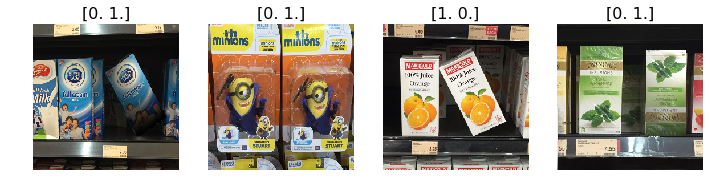

In [197]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [198]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 1., 0.], dtype=float32)

In [199]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [200]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [201]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [202]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color='white' if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Confusion matrox, without normalization
[[0 3]
 [0 1]]


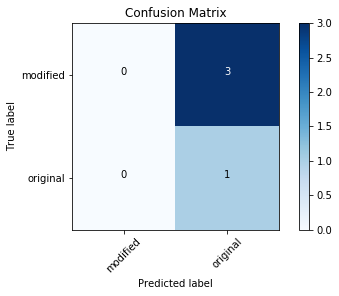

In [203]:
cm_plot_labels = ['modified', 'original']
plot_confusion_matrix(cm, cm_plot_labels, title="Confusion Matrix")